In [15]:
import covasim as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import json
from scipy.optimize import minimize
import sys
sys.path.append('./models/')
from SIRD import SIRD_model_2, run_sir, differenciate


The simulation will take place between start_day and end_day.

In [2]:
start_day = '2020-03-02'
end_day   = '2020-07-01'
date_range = pd.date_range(start=start_day, end=end_day, freq='D')
all_days = cv.date_range(start_day, end_day)
beta_initial=0.015

Extraction of the synthetized data: 

In [3]:
df = pd.read_csv('deaths_and_infections.csv')
# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)

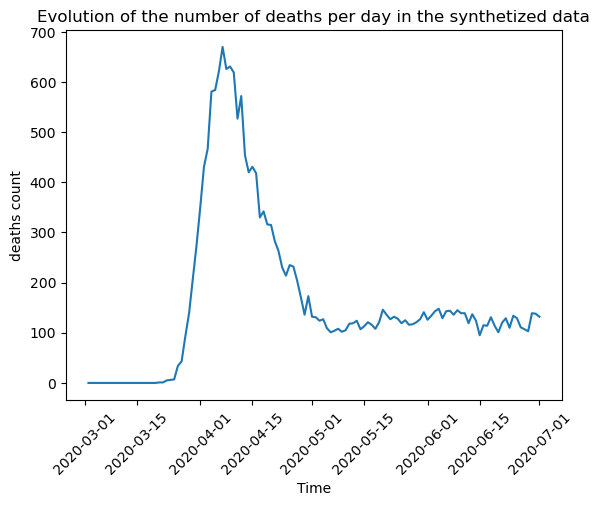

In [4]:
date_range = pd.date_range(start=start_day, end=end_day, freq='D')
plt.plot(date_range, df['new_deaths'], label='new_deaths')
plt.title('Evolution of the number of deaths per day in the synthetized data')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('deaths count')

plt.show()

In [5]:
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

Training a SIRD model : 

In [6]:
SIRD=SIRD_model_2()
SIRD.choose_model(True, True)
SIRD.train(dates_of_pandemic[:35], new_deaths[:35])

In [7]:
S, I, R, D=run_sir([1000000, 1, 0, 0], SIRD.beta, SIRD.gamma, SIRD.d, len(new_deaths), 0.001)

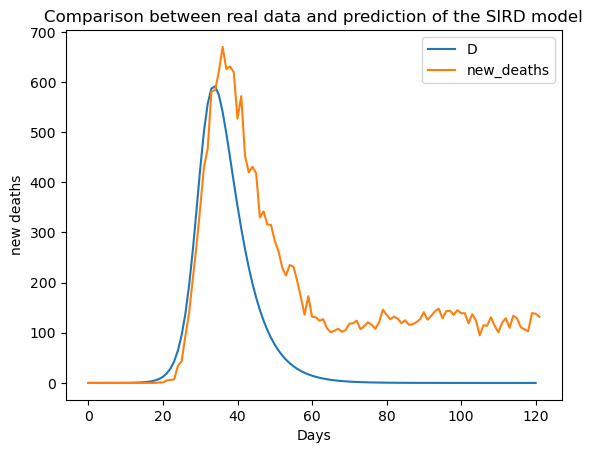

In [12]:
plt.plot(differenciate(D), label='D')
plt.plot(new_deaths, label='new_deaths')
plt.title('Comparison between real data and prediction of the SIRD model')
plt.xlabel('Days')
plt.ylabel('new deaths')
plt.legend()
plt.show()

We run an exeample of SIR with same population size as in the Swedish model: 

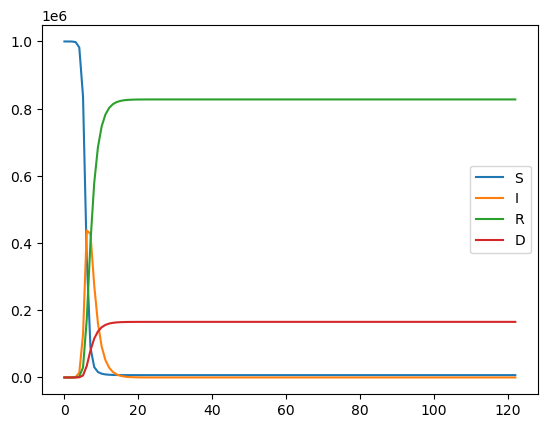

In [13]:
s_0=1000000 -1
i_0=1
r_0=0
d_0=0
beta=0.5
gamma=0.001
d=0.0005
t=len(death_cumul-1)
dt=0.001
beta=3
gamma=0.5
d=0.1
S, I, R, D=run_sir([s_0, i_0, r_0, d_0], beta, gamma,d, t, dt)
time=np.linspace(0, t, t)
plt.plot(time, S,  label='S')
plt.plot(time, I, label='I')
plt.plot(time,R, label='R')
plt.plot(time, D, label='D')
plt.legend()
plt.show()

We faced difficulties to understand the real role of change_beta, the test are here to explain it

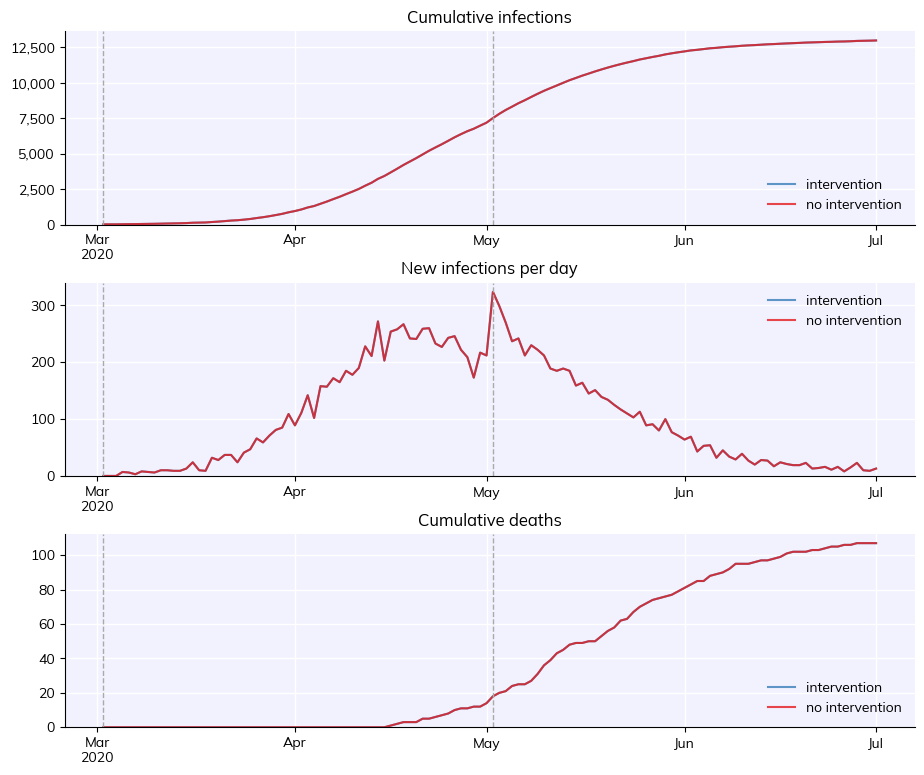

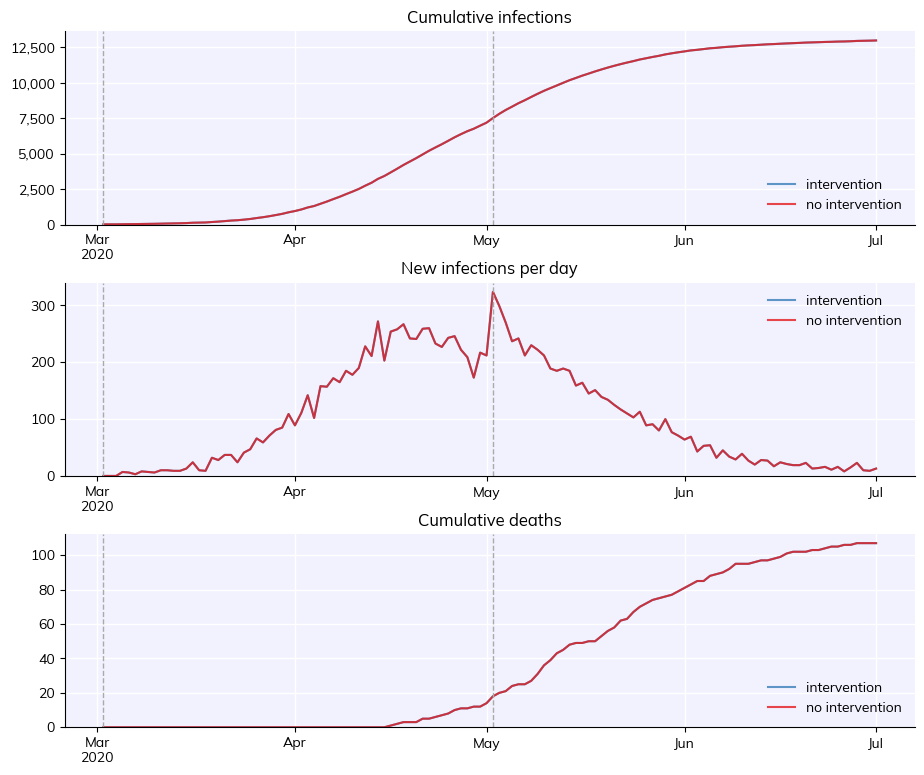

In [14]:
# THIS CELLE ENABLES TO CHECK WHAT change_beta REALLY DOES


# change beta enables to modify the beta_init value at a certain date by multiplying it by a scaling factor 



param1=dict(pop_size=10000,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                                             # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

                            start_day = start_day,
                            end_day   = end_day,
                            pop_type = 'hybrid',
                            beta=0.015,  # value to change. There seems to be a problem, as when 
                            # I change the value of beta to 0.15, the curve drastically change when it shoudln't. 
                            # with several tries, it seems that the model begins with a value of beta equal to 1. 
                            location = 'Sweden',
                            pop_infected = 20, #value by default, TOCHANGE
                            
                            )


param2=dict(pop_size=10000,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                                             # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

                            start_day = start_day,
                            end_day   = end_day,
                            pop_type = 'hybrid',
                            beta=1,  # value to change. There seems to be a problem, as when 
                            # I change the value of beta to 0.15, the curve drastically change when it shoudln't. 
                            # with several tries, it seems that the model begins with a value of beta equal to 1. 
                            location = 'Sweden',
                            pop_infected = 20, #value by default, TOCHANGE
                            
                            )




cb1=cv.change_beta(days=['2020-03-02',  '2020-05-02',  ], changes=[1, 2], do_plot=True)
cb2=cv.change_beta(days=['2020-03-02',  '2020-05-02',  ], changes=[0.015, 0.03], do_plot=True)

sim1=cv.Sim(param1, interventions=cb1, label='intervention')
sim2=cv.Sim(param2, interventions=cb2, label='no intervention')
msim=cv.MultiSim([sim1, sim2])
msim.run()
msim.plot()

